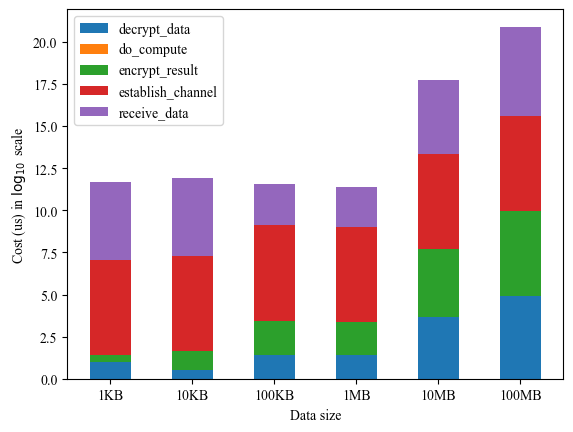

In [7]:
import numpy as np

xs = ['1KB', '10KB', '100KB', '1MB', '10MB', '100MB']
ys = []
names = ('decrypt_data', 'do_compute', 'encrypt_result', 'establish_channel', 'receive_data')

with open('../data/cost_sev.txt') as file:
    for line in file:
        if 'by' in line:
            ys.append([])
            breakup = line.split("by",1)[1].replace('}', '').replace('{', '').split(', ')
            for data in breakup:
                # ms
                data = float(data.split(': ')[1])
                ys[-1].append(np.log10(data))
d = {}

for i in range(len(names)):
    d[names[i]] = []
    for j in range(len(ys)):
       d[names[i]].append(ys[j][i])

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'
fig, ax = plt.subplots()
bottom = np.zeros(6)
for k, v in d.items():
    p = ax.bar(xs, v, 0.5, label=k, bottom=bottom)
    bottom += v

ax.set_xlabel('Data size')
ax.set_ylabel('Cost (us) in $\log_{10}$ scale')
ax.legend(loc="upper left")
plt.savefig("../cost_breakup_sev.pdf", bbox_inches='tight')